### Imports

In [1]:
import pandas as pd
import numpy as n
import seaborn as sns
from urllib import request, parse
from bs4 import BeautifulSoup
from matplotlib import pyplot as plt
import math

### Constants

In [2]:
tcp_url = 'http://tcpip.epfl.ch/output.php'
sciper = 219665
columns=['Sciper', 'Requests/s', 'Access Points', 'Servers', 'Theta', 'Packets/s', 'Collision Probability', 'Delay']

In [3]:
def get_res(columns, sciper, clients, apoints, servers):
    data = {'sciper':sciper, 'clients':clients, 'apoints':apoints, 'servers':servers}
    encoded_data = parse.urlencode(data).encode()
    # POST to the remote endpoint
    req =  request.Request(tcp_url, data=encoded_data)
    # This will contain the response page
    with request.urlopen(req) as resp:
        # Reads and decodes the body response data
        body_data = resp.read().decode('utf-8')
        soup = BeautifulSoup(body_data, 'html.parser')
        table = soup.find_all('table')[0]
        #make pandas dataframe from table & transpose for readability
        df = pd.read_html(str(table))[0].transpose()
        #drop useless columns
        df = df.drop(columns=[0,5])
        df.columns = columns
        #return dataframe
        return df.iloc[1]

In [5]:
get_res(columns, sciper, 100, 2, 3) 

Sciper                     219665
Requests/s                    100
Access Points                   2
Servers                         3
Theta                      99.412
Packets/s                 497.755
Collision Probability    0.019173
Delay                    0.697375
Name: 1, dtype: object

In [6]:
get_res(columns, sciper, 100, 2, 3) 

Sciper                     219665
Requests/s                    100
Access Points                   2
Servers                         3
Theta                      98.138
Packets/s                 491.593
Collision Probability    0.018535
Delay                    0.560932
Name: 1, dtype: object

In [7]:
#perform requests on simulation for given range of clients, access points and number of servers.
def get_values(columns, sciper, clients_min, clients_max, apoints_min, apoints_max, servers_min, servers_max):
    values = pd.DataFrame(columns=columns)
    for client in range(clients_min, clients_max):
        for apoint in range(apoints_min, apoints_max):
            for server in range(servers_min, servers_max):
                r = get_res(columns, sciper, client, apoint, server)
                values = values.append(r)
    values = values.reset_index(drop=True)
    return values

In [62]:
#plot values from responses
def plot_values(values):
    fig,axa = plt.subplots(nrows=2, ncols=2, figsize=(12,12))
    aw = values.plot.scatter(x='Requests/s', y='Theta', ax=axa[0,0])
    ax = values.plot.scatter(x='Requests/s', y='Packets/s', ax=axa[0,1])
    ay = values.plot.scatter(x='Requests/s', y='Collision Probability', ax=axa[1,0])
    az = values.plot.scatter(x='Requests/s', y='Delay', ax=axa[1,1])

In [10]:
values = get_values(columns, sciper, 1, 1001, 1, 2, 1, 2)

In [11]:
values2 = get_values(columns, sciper, 1, 1001, 2, 3, 2, 3)

In [25]:
values.head()

,Sciper,Requests/s,Access Points,Servers,Theta,Packets/s,Collision Probability,Delay,Ratio
0,219665.0,1.0,1.0,1.0,0.999,6.014,0.000013,0.155536,0.166112
1,219665.0,2.0,1.0,1.0,1.911,12.463,0.000018,0.154497,0.153334
2,219665.0,3.0,1.0,1.0,2.878,12.293,0.000019,0.187807,0.234117
3,219665.0,4.0,1.0,1.0,3.922,37.883,0.000021,0.210774,0.103529
4,219665.0,5.0,1.0,1.0,4.774,15.262,0.000025,0.142829,0.312803


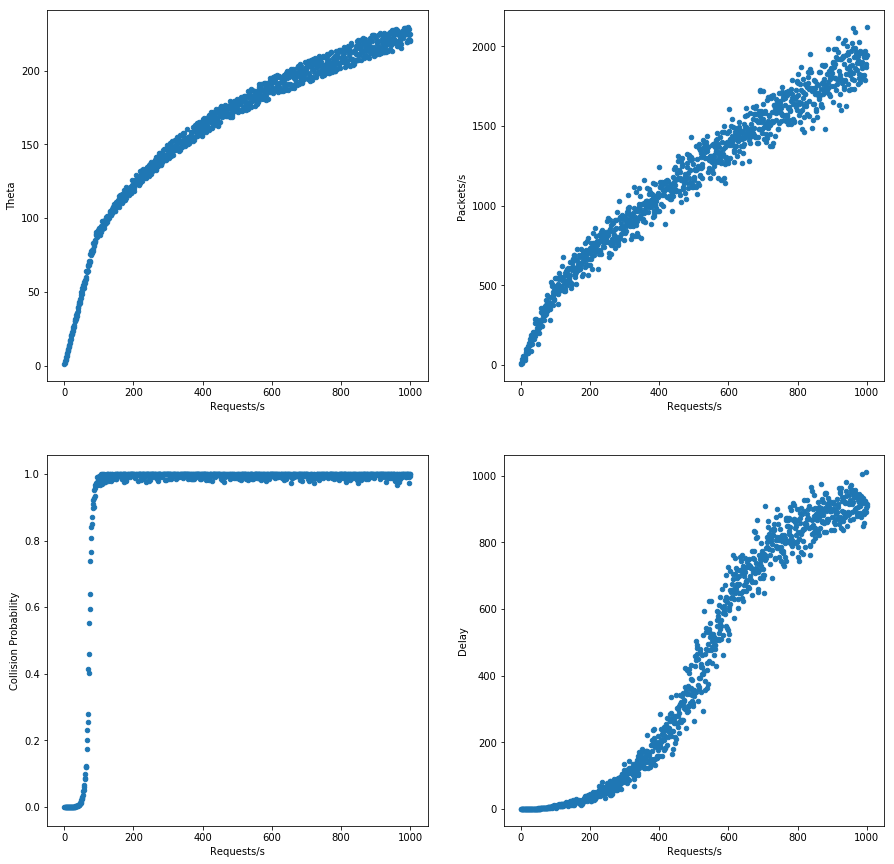

In [32]:
plot_values(values)

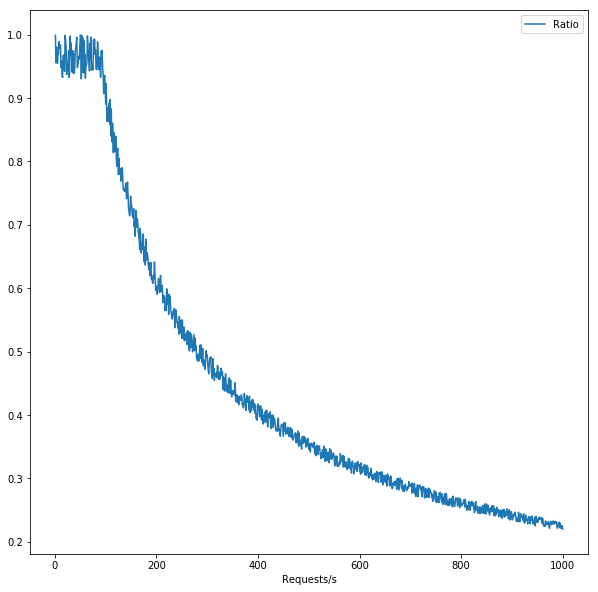

In [57]:
values['Ratio'] = values['Theta']/values['Requests/s']
aw = values.plot.line(x='Requests/s', y='Ratio', figsize=(10,10))

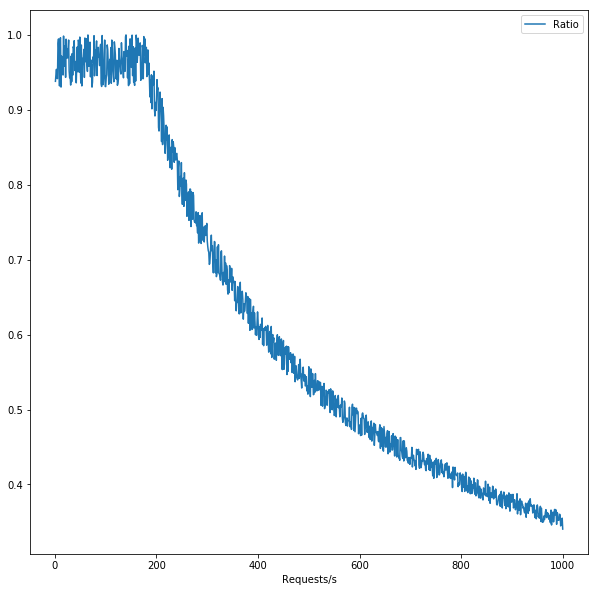

In [58]:
values2['Ratio'] = values2['Theta']/values2['Requests/s']
aw = values2.plot.line(x='Requests/s', y='Ratio', figsize=(10,10))

In [59]:
values3 = get_values(columns, sciper, 1, 1001, 10, 11, 10, 11)

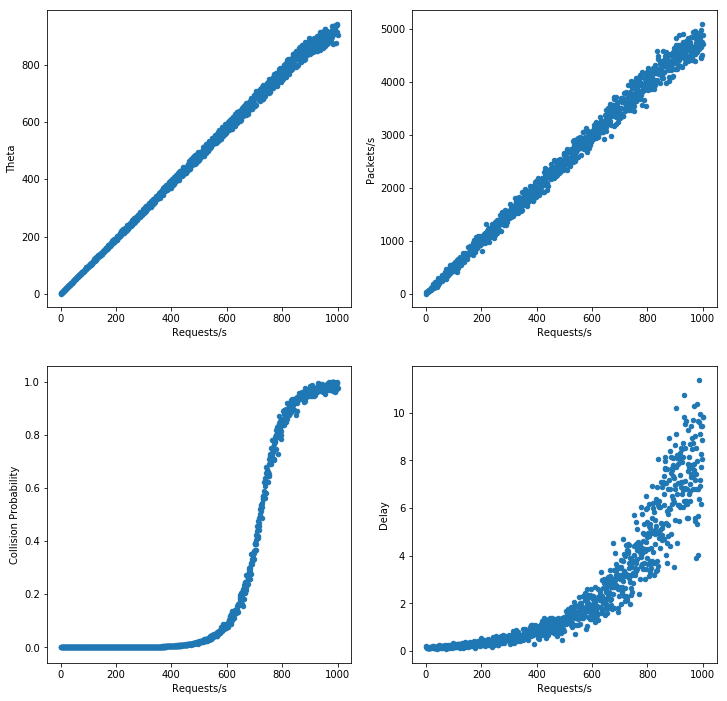

In [63]:
plot_values(values3)

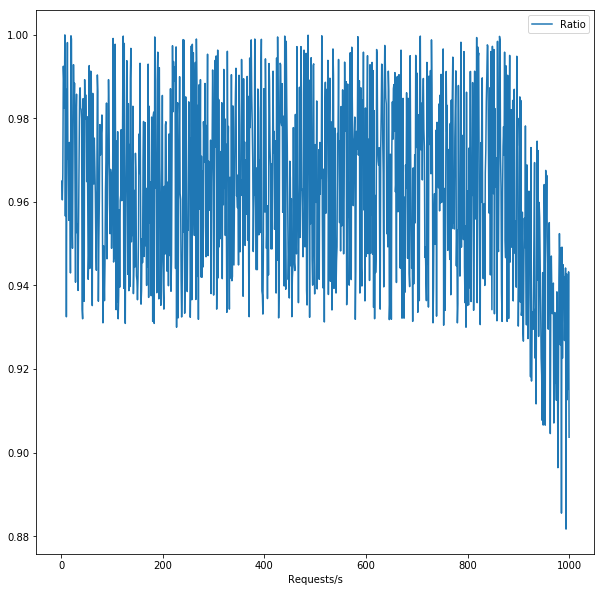

In [61]:
values3['Ratio'] = values3['Theta']/values3['Requests/s']
aw = values3.plot.line(x='Requests/s', y='Ratio', figsize=(10,10))

In [72]:
#get values for a given range of clients and corresponding ratio
def get_values_ratio(columns, sciper, clients_min, clients_max, divAP, divS):
    values = pd.DataFrame(columns=columns)
    for client in range(clients_min, clients_max):
        r = get_res(columns, sciper, client, math.ceil(client/divAP), math.ceil(client/divS))
        values = values.append(r)
    values = values.reset_index(drop=True)
    return values

In [68]:
#plot values from responses
def plot_values_line(values):
    fig,axa = plt.subplots(nrows=2, ncols=2, figsize=(12,12))
    aw = values.plot.line(x='Requests/s', y='Theta', ax=axa[0,0])
    ax = values.plot.line(x='Requests/s', y='Packets/s', ax=axa[0,1])
    ay = values.plot.line(x='Requests/s', y='Collision Probability', ax=axa[1,0])
    az = values.plot.line(x='Requests/s', y='Delay', ax=axa[1,1])

In [81]:
values4 = get_values_ratio(columns, sciper, 1, 1001, 100.0, 100.0)

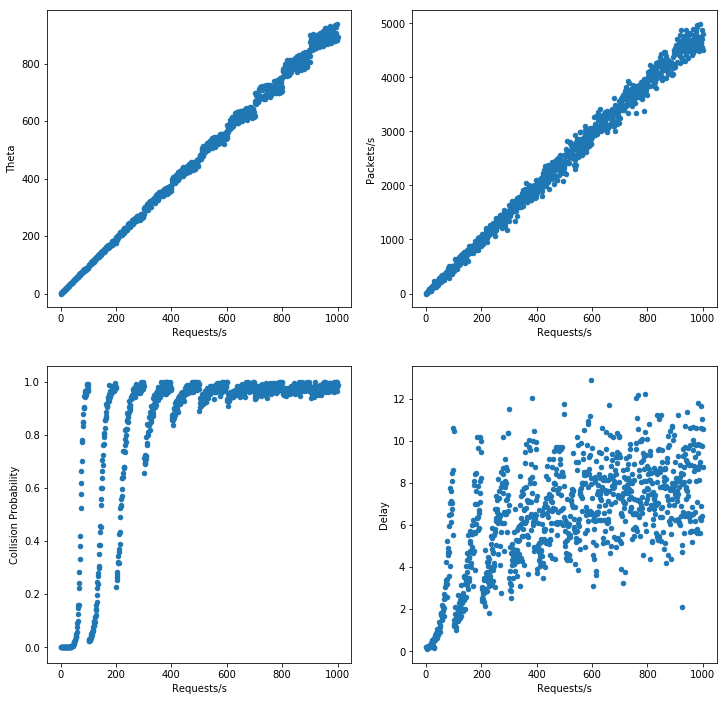

In [83]:
plot_values(values4)

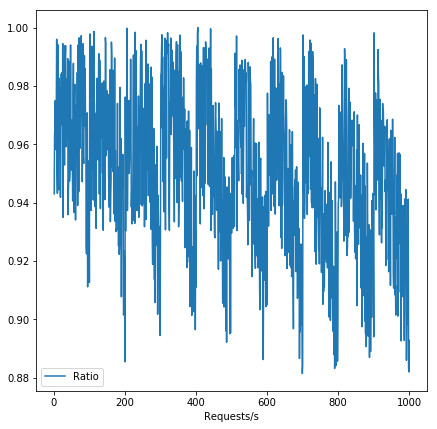

In [85]:
values4['Ratio'] = values4['Theta']/values4['Requests/s']
aw = values4.plot.line(x='Requests/s', y='Ratio', figsize=(7,7))

In [90]:
#get values for a given range of clients and corresponding ratio
def get_values_ratio_cap(columns, sciper, clients_min, clients_max, divAP, divS, capAP, capS):
    values = pd.DataFrame(columns=columns)
    for client in range(clients_min, clients_max):
        a = math.ceil(client/divAP)
        b = math.ceil(client/divS)
        if a > capAP:
            a = capAP
        if b > capS:
            b = capS
        r = get_res(columns, sciper, client, a, b)
        values = values.append(r)
    values = values.reset_index(drop=True)
    return values

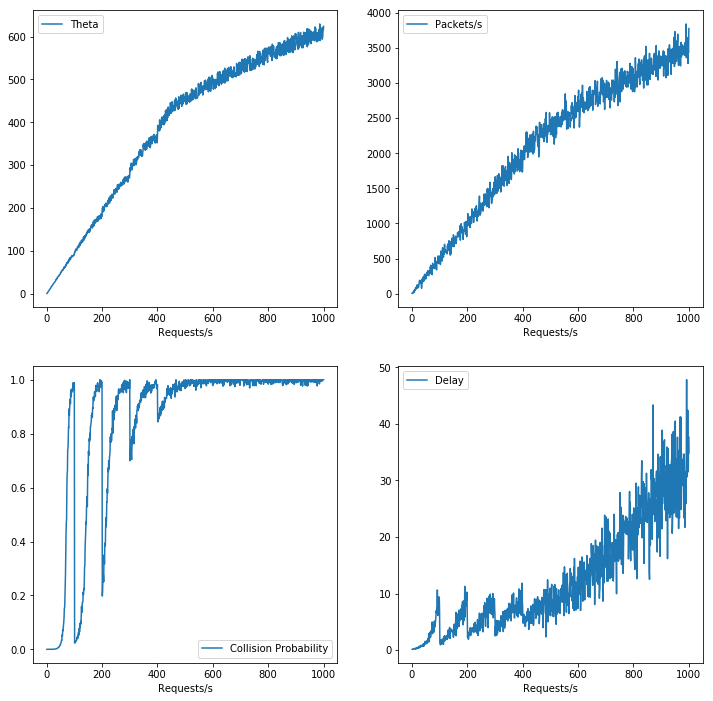

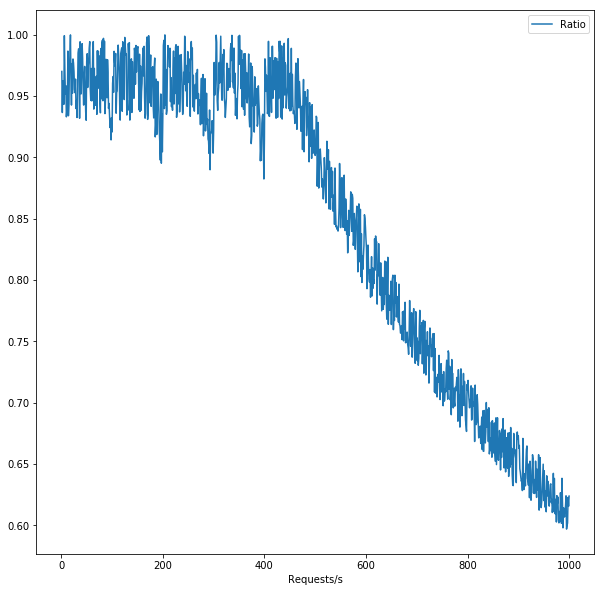

In [91]:
values5 = get_values_ratio_cap(columns, sciper, 1, 1001, 100.0, 100.0, 5, 5)
plot_values_line(values5)
values5['Ratio'] = values5['Theta']/values5['Requests/s']
aw = values5.plot.line(x='Requests/s', y='Ratio', figsize=(10,10))

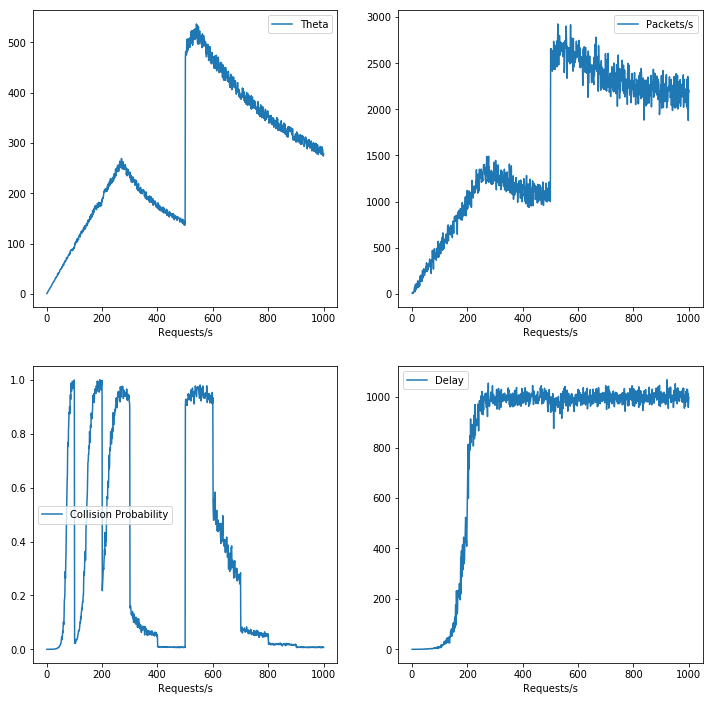

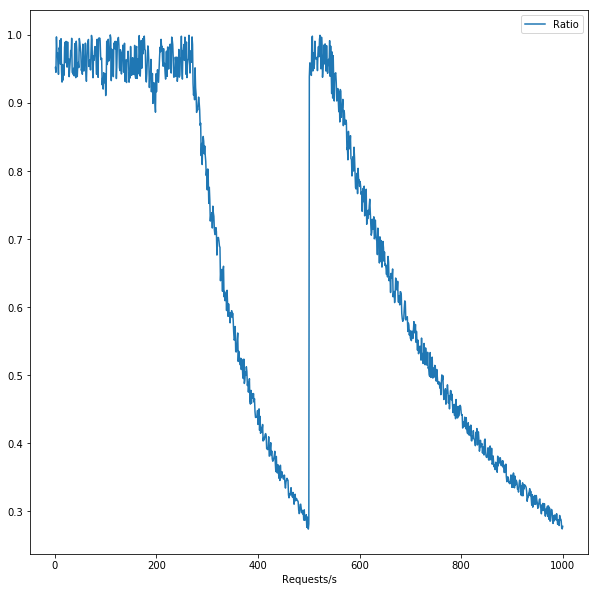

In [94]:
values5 = get_values_ratio(columns, sciper, 1, 1001, 100.0, 500.0)
plot_values_line(values5)
values5['Ratio'] = values5['Theta']/values5['Requests/s']
aw = values5.plot.line(x='Requests/s', y='Ratio', figsize=(10,10))

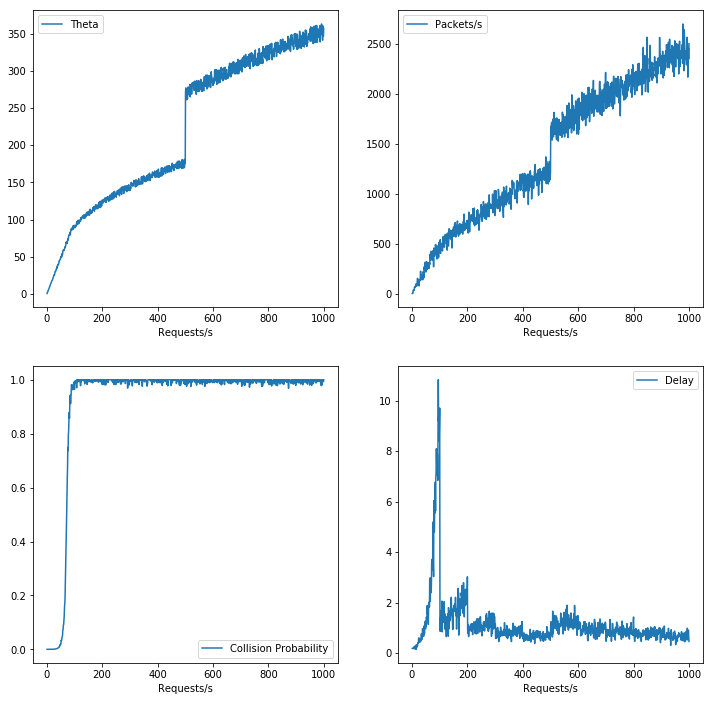

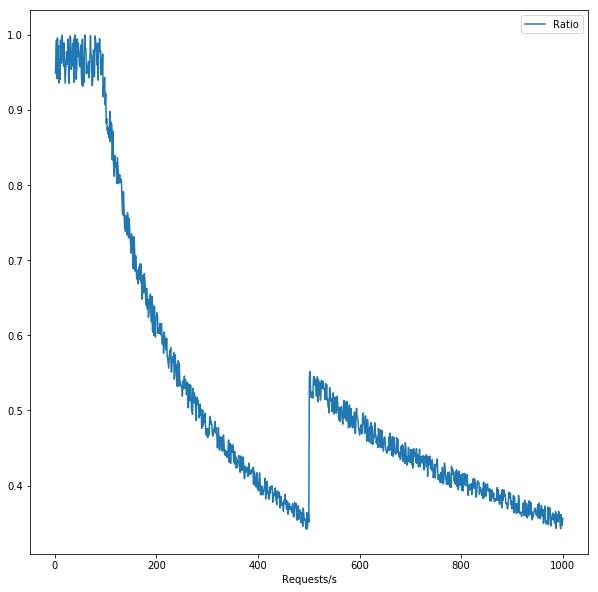

In [95]:
values5 = get_values_ratio(columns, sciper, 1, 1001, 500.0, 100.0)
plot_values_line(values5)
values5['Ratio'] = values5['Theta']/values5['Requests/s']
aw = values5.plot.line(x='Requests/s', y='Ratio', figsize=(10,10))